## DBSCAN Clustering to identify Outliers

In [1]:
## Import all libraries
import pandas as pd
from pylab import rcParams
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from collections import Counter

In [3]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

In [8]:
## Import our IRIS data
df = pd.read_csv("Datasets/IRIS.csv", sep=',')
## Rename columns 
df.columns = ["Sepal Length", "Sepal Width", "Petal Length", "Petal Width", "Species"]
## split data
data = df.iloc[:,0:4]
target = df.iloc[:,4]
df[:5]

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [5]:
## Create model
model = DBSCAN(eps= 0.8, min_samples=19, n_jobs=-1).fit(data)
print(model)

DBSCAN(algorithm='auto', eps=0.8, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=19, n_jobs=-1, p=None)


## Visualize your results

In [9]:
outliers_df = pd.DataFrame(data)
print(Counter(model.labels_))
print(outliers_df[model.labels_ == -1])

Counter({1: 94, 0: 49, -1: 6})
     Sepal Length  Sepal Width  Petal Length  Petal Width
97            5.1          2.5           3.0          1.1
104           7.6          3.0           6.6          2.1
116           7.7          3.8           6.7          2.2
117           7.7          2.6           6.9          2.3
121           7.7          2.8           6.7          2.0
130           7.9          3.8           6.4          2.0


Text(0.5, 1.0, 'DBSCAN for Outlier Detection')

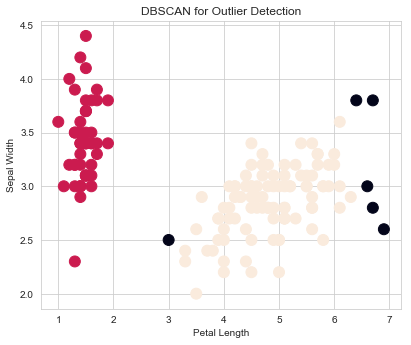

In [16]:
fig = plt.figure()
ax = fig.add_axes([.1,.1, 1,1])
colors = model.labels_
ax.scatter(data.iloc[:,2], data.iloc[:,1], c=colors, s=120)

ax.set_xlabel('Petal Length')
ax.set_ylabel('Sepal Width')
plt.title('DBSCAN for Outlier Detection')